# Análisis exploratorio de datos - EDA

## Limpieza y transformación inical
Cada uno de los archivos iniciales presentaba columnas columnas anidadas, las cuales se desanidaron para facilitar el respectivo análisis, asi mismo una vez desanidadas las respectivas columnas, se eliminaron las columnas anidadas, las que tenian datos nulos en todas la filas y aquellas que no tienen relación con las consultas para los end points y/o para el modelo de aprendizaje. También se eliminaron aquellas filas que tenian datos nulos en todas las columnas, ya que ninguno de estos datos aportaba información relevante.

## Librerias a utilizar

In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
from datetime import datetime
import os

## Rutas para los archivos

### user_reviews

In [2]:
# Lee el archivo parquet comprimido
df_reviews = pd.read_parquet("C:/Users/57315/Documentos/Phyton_Henry/recomendaciones_steam/datasets_post_limpieza/df_reviews.parquet.gzip")

### user_items

In [3]:
# Lee el archivo parquet comprimido
df_items = pd.read_parquet("C:/Users/57315/Documentos/Phyton_Henry/recomendaciones_steam/datasets_post_limpieza/df_items.parquet.gzip")

### steam_games

In [4]:
# Lee el archivo parquet comprimido
df_games = pd.read_parquet("C:/Users/57315/Documentos/Phyton_Henry/recomendaciones_steam/datasets_post_limpieza/df_games.parquet.gzip")

## Análisis por archivo

### df_reviews

#### Información Básica

Este dataframe contiene 8 columnas, de las cuales 8 de ellas presentan 28 filas con datos nulos. Al realizar una revisión de estas filas se encuentra que a excepción del item_id, las filas en cuestion no tienen datos importantes, por lo tanto se eliminan.

Las columnas funny y helpful son cadenas de texto que indican la cantidad de personas para las cuales la review fue divertida y/o de ayuda, parámetros que no se requieren ya que se tendran en cuenta las columnas recomended y el análisis de sentimiento de la columna review, en consecuencia se eliminan las columnas funny y helpful.

Las columnas posted y last_edit representan fechas, pero tienen elementos tipo str también, se decide eliminar estos caracteres str para dar formato de fecha a estas columnas.

Se dan formatos de entero a la columna item_id que representa identificadores para los juegos y de cadena a columna review que representa la reseña dejada por el usuario, para su posterior analisis.

In [5]:
# Muestra las primeras filas del dataframe
df_reviews.head()

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479
0,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479
0,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
1,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637
1,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637


In [6]:
# Brinda información resumida del dataframe
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58458 entries, 0 to 25798
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   funny        58430 non-null  object
 1   posted       58430 non-null  object
 2   last_edited  58430 non-null  object
 3   item_id      58430 non-null  object
 4   helpful      58430 non-null  object
 5   recommend    58430 non-null  object
 6   review       58430 non-null  object
 7   user_id      58458 non-null  string
dtypes: object(7), string(1)
memory usage: 4.0+ MB


In [7]:
# Cuenta la cantidad de filas con valores nulos en cada columna
df_reviews.isnull().sum()

funny          28
posted         28
last_edited    28
item_id        28
helpful        28
recommend      28
review         28
user_id         0
dtype: int64

In [8]:
# Elimina columnas con información irrelevante
df_reviews = df_reviews.drop(columns=['funny', 'helpful'])

In [9]:
# Elimina el texto "Posted" y "." de la columna posted
df_reviews['posted'] = df_reviews['posted'].str.replace('Posted ', '')
df_reviews['posted'] = df_reviews['posted'].str.replace('.', '')

In [10]:
# Convierte la columna 'date_posted' a tipo datetime
df_reviews['posted'] = pd.to_datetime(df_reviews['posted'], errors='coerce')

# Extrae solo la parte de la fecha
df_reviews['posted'] = df_reviews['posted'].dt.date

In [11]:
# Elimina el texto "last_edited" y "." de la columna last edited
df_reviews['last_edited'] = df_reviews['last_edited'].str.replace('Last edited ', '')
df_reviews['last_edited'] = df_reviews['last_edited'].str.replace('.', '')

In [12]:
# Convierte la columna 'last_edited' a tipo datetime
df_reviews['last_edited'] = pd.to_datetime(df_reviews['last_edited'], errors='coerce')

# Extrae solo la parte de la fecha
df_reviews['last_edited'] = df_reviews['last_edited'].dt.date

In [13]:
# Da formato de entero a la columna item_id
df_reviews['item_id'] = pd.to_numeric(df_reviews['item_id'] )

In [14]:
# Da formato de cadena a la columna review
df_reviews['review'] = df_reviews['review'].apply(str)

In [15]:
# Revisa cuales son las filas que tienen a excepción de user_id y review, todas las columnas con valores nulos
filas_con_todo_nulo_exp_id_rev = df_reviews[(df_reviews['user_id'].notnull()) & (df_reviews['posted'].isnull())]
filas_con_todo_nulo_exp_id_rev

,posted,last_edited,item_id,recommend,review,user_id
2,NaN,NaN,248820.0,True,A suitably punishing roguelike platformer. Wi...,evcentric
6,NaN,NaN,730.0,True,ZIKA DO BAILE,76561198079601835
7,NaN,NaN,730.0,True,BEST GAME IN THE BLOODY WORLD,MeaTCompany
9,NaN,NaN,252950.0,True,love it,76561198156664158
10,NaN,NaN,440.0,True,mt bom,76561198077246154
...,...,...,...,...,...,...
25797,NaN,NaN,70.0,True,a must have classic from steam definitely wort...,76561198312638244
25797,NaN,NaN,362890.0,True,this game is a perfect remake of the original ...,76561198312638244
25798,NaN,NaN,273110.0,True,had so much fun plaing this and collecting res...,LydiaMorley
25798,NaN,NaN,730.0,True,:D,LydiaMorley


In [16]:
# Elimina las filas que por su cantidad de valores nulos no aportan información relevante
df_reviews = df_reviews.dropna(subset='posted')

In [17]:
# Genera nuevo archivo a partir de un dataframe
df_reviews.to_parquet('C:/Users/57315/Documentos/Phyton_Henry/recomendaciones_steam/datasets_post_limpieza/df_reviews_clean.parquet.gzip', compression='gzip')

#### Estadísticas descriptivas

In [18]:
# Muestra estadisticas descriptivas de todas las columnas
df_reviews.describe(include='all')

,posted,last_edited,item_id,recommend,review,user_id
count,48498,4219,48498.000000,48498,48498,48498
unique,1644,755,NaN,2,45944,22795
top,2014-06-21,2013-11-25,NaN,True,good game,SpiritOfDeath2
freq,220,99,NaN,43557,86,10
mean,NaN,NaN,155294.235515,NaN,NaN,NaN
std,NaN,NaN,124542.998755,NaN,NaN,NaN
min,NaN,NaN,10.000000,NaN,NaN,NaN
25%,NaN,NaN,6550.000000,NaN,NaN,NaN
50%,NaN,NaN,209080.000000,NaN,NaN,NaN
75%,NaN,NaN,247910.000000,NaN,NaN,NaN


**Observaciones**

Para el periodo de teimpo analizado, La fecha con mayor cantidad de publicaciones de reseñas es el 21 de junio de 2014, con una frecuencia de 220.

#### Distribución de variables categoricas

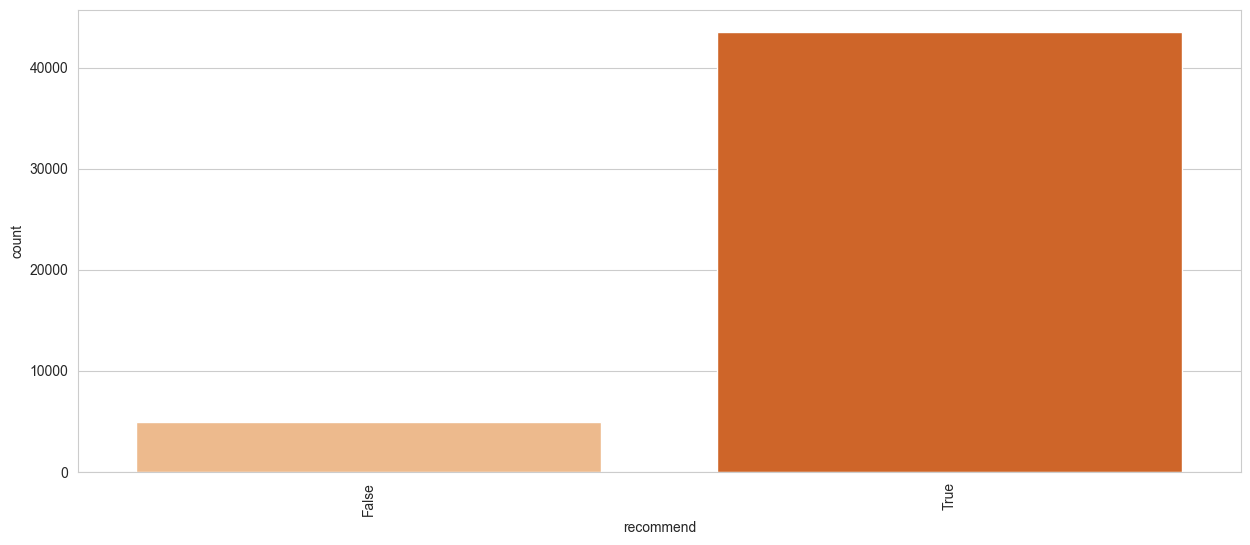

In [19]:
# Configura el tamaño de la figura (ancho, alto)
plt.figure(figsize=(15, 6))  

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Crea el gráfico de barras
sns.countplot(x='recommend', data=df_reviews, palette='Oranges')

# Gira las etiquetas del eje x
plt.xticks(rotation=90)  

# Muestra el gráfico
plt.show()

**Observaciones**

Independientemente del juego, la gran mayoria de las recomedaciones son positivas, con una frecuencia 5 veces mayor a las recomendaciones negativas.

### df_items

#### Información Básica

Este dataframe cuenta con 6 columnas, de ellas 2 presentan datos nulos en 16714 filas, al realizar una revisión de estas filas se encuentra que los datos nulos tambien se encuentran en la columna item_id, esto no se notaba antes porque la columna era tipo object, pero al convertirla al tipo numérico se logran ver los datos nulos, además para estas filas item_name aparece como una cadena vacia e item_count aparece en cero, por lo tanto estas filas no estan aportando información relevante y se decide eliminarlas.

Columnas y datos:
La columna user_id se refiere al identificador unico del usuario, este puede ser un a combinación de numeros y/ o letras.
La columna item_count muestra la cantidad de de juegos usados por el usuario.
La columna item_name muestra el nombre del juego.
La columna playtime_forever muestra el tiempo de juego en horas
La columna playtiem2week no es relevante para el presente análisis, por lo tanto se elimina.

Se cambia el tipo de datos de las columnas item_id e item_name a tipo numerico, primero flotante y luego a entero, y cadena respectivamente, para facilitar la visualización de datos nulos, las operaciones y reducir el espacio ocupado en memoria.

No hay la misma cantidad de valores unicos de item_id e item_name, partiendo de la premisa que ambos valores deben ser unicos para cada item, es posible que haya filas que muestren diferentes item_id para el mismo item_name, esto se revisa más adelante con df_games.

In [20]:
# Muestra las primeras filas del dataframe
df_items.head()

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
indice_original,,,,,,
0,76561197970982479,277,10,Counter-Strike,6.0,0.0
0,76561197970982479,277,20,Team Fortress Classic,0.0,0.0
0,76561197970982479,277,30,Day of Defeat,7.0,0.0
0,76561197970982479,277,40,Deathmatch Classic,0.0,0.0
0,76561197970982479,277,50,Half-Life: Opposing Force,0.0,0.0


In [21]:
# Brinda información resumida del dataframe
df_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110796 entries, 0 to 88309
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           string 
 1   items_count       int64  
 2   item_id           object 
 3   item_name         object 
 4   playtime_forever  float64
 5   playtime_2weeks   float64
dtypes: float64(2), int64(1), object(2), string(1)
memory usage: 272.9+ MB


In [22]:
# Cuenta los valores nulos en cada columna
df_items.isnull().sum()

user_id                 0
items_count             0
item_id                 0
item_name               0
playtime_forever    16714
playtime_2weeks     16714
dtype: int64

In [23]:
df_items = df_items.drop(columns='playtime_2weeks')

In [24]:
# Convertir la columna 'item_id' a tipo float
df_items['item_id'] = pd.to_numeric(df_items['item_id'], errors='coerce')

In [25]:
#Revisa cuales son las filas que tienen a excepción de user_id y review, todas las columnas con valores nulos
filas_con_todo_nulo_exp_id = df_items[(df_items['user_id'].notnull()) & (df_items['item_id'].isnull()) & (df_items['playtime_forever'].isnull()) ]
filas_con_todo_nulo_exp_id

,user_id,items_count,item_id,item_name,playtime_forever
indice_original,,,,,
9,Wackky,0,NaN,,NaN
11,76561198079601835,0,NaN,,NaN
31,hellom8o,0,NaN,,NaN
38,starkillershadow553,0,NaN,,NaN
54,darkenkane,0,NaN,,NaN
...,...,...,...,...,...
88298,76561198316380182,0,NaN,,NaN
88299,76561198316970597,0,NaN,,NaN
88300,76561198318100691,0,NaN,,NaN


In [26]:
# Elimina las filas que cumplen con la condición 
df_items = df_items.dropna(subset='item_id')

In [27]:
# Cambia el tipo de datos de la columna item_id de float a int
df_items['item_id'] = pd.to_numeric(df_items['item_id'], downcast='integer')

In [28]:
# Cambia el tipo de la columna item_name de object a str
df_items['item_name'] = df_items['item_name'].astype('str')

In [29]:
# Convierte todos los nombres a minúsculas para evitar que se creen valores unicos con nombres repetidos
df_items['item_name'] = df_items['item_name'].str.lower()

In [30]:
# Revisa la cantidad de valores unicos para item_name e item_id
unique_item_names = df_items['item_name'].unique()
print(unique_item_names)
print("Cantidad total de valores únicos:", len(unique_item_names))
print("¿Hay valores NaN?:", pd.isnull(unique_item_names).any())

unique_item_ids = df_items['item_id'].unique()
print(unique_item_ids)
print("Cantidad total de valores únicos:", len(unique_item_ids))
print("¿Hay valores NaN?:", pd.isnull(unique_item_ids).any())

['counter-strike' 'team fortress classic' 'day of defeat' ... 'chaostower'
 'aveyond 4: shadow of the mist' 'arachnophobia']
Cantidad total de valores únicos: 10944
¿Hay valores NaN?: False
[    10     20     30 ... 354280 433920 485270]
Cantidad total de valores únicos: 10978
¿Hay valores NaN?: False


In [31]:
# Genera nuevo archivo a partir de un dataframe
df_items.to_parquet('C:/Users/57315/Documentos/Phyton_Henry/recomendaciones_steam/datasets_post_limpieza/df_items_clean.parquet.gzip', compression='gzip')

#### Estadísticas Descriptivas

In [32]:
df_items.describe(include='all')

,user_id,items_count,item_id,item_name,playtime_forever
count,5094082,5.094082e+06,5.094082e+06,5094082,5.094082e+06
unique,70912,NaN,NaN,10944,NaN
top,phrostb,NaN,NaN,dota 2 test,NaN
freq,7762,NaN,NaN,49136,NaN
mean,NaN,3.157332e+02,1.783915e+05,NaN,9.905070e+02
std,NaN,6.969087e+02,1.318514e+05,NaN,5.414098e+03
min,NaN,1.000000e+00,1.000000e+01,NaN,0.000000e+00
25%,NaN,7.100000e+01,3.445000e+04,NaN,0.000000e+00
50%,NaN,1.370000e+02,2.144200e+05,NaN,3.400000e+01
75%,NaN,2.750000e+02,2.664300e+05,NaN,3.550000e+02


**Observaciones**

El usuario con mayor variedad de juegos en los que esta registrado es phrostb con 7762 juegos

La cantidad de item_id e item_name unicos no es igual, además hay item_name iguales con diferente item_id, por lo que es posible que se trate de ediciones o versiones  diferentes del mismo juego

El tiempo total de juego máximo registrado es de 642773.0 horas, sin embargo el 50% de los jugadores resgistran un total de tiempo de juego por contenido de 34 horas.

#### Distribución de variables cuantitativas

c:\Users\57315\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


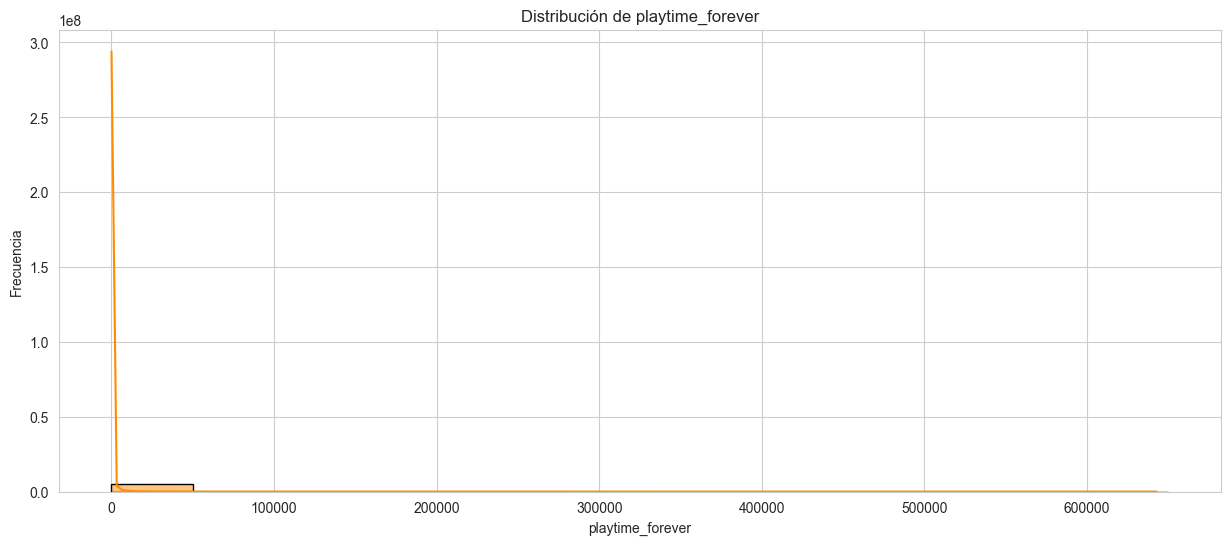

In [33]:
# Histograma de 'playtime_forever'
# Configura el tamaño de la figura ancho, largo
plt.figure(figsize=(15, 6))

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Crea el histograma con Seaborn
sns.histplot(data=df_items, x='playtime_forever', binwidth=50000, kde=True, color='darkorange', edgecolor='black')

# Agrega etiquetas y título
plt.title('Distribución de playtime_forever')
plt.xlabel('playtime_forever')
plt.ylabel('Frecuencia')

# Muestra el histograma
plt.show()


**Observaciones**

La mayoria de los usuarios tienen un tiempo total de juego entre 0 y 50000 horas, no obstante hay usuarios que superan las 600000 horas de juego.

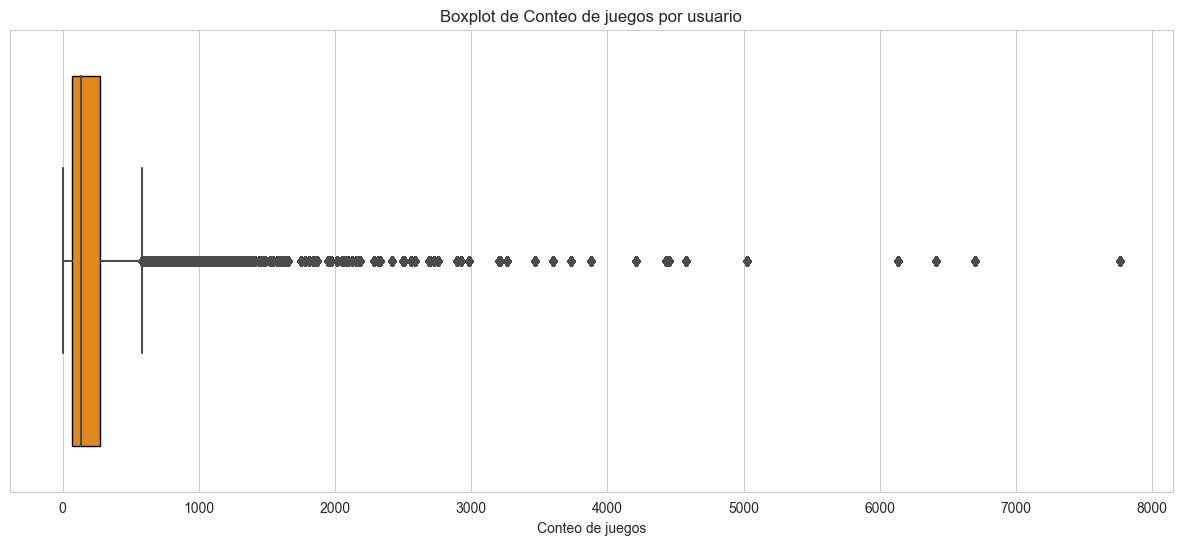

In [34]:
# Boxplot de 'items_count'
# Configura el tamaño de la figura ancho, largo
plt.figure(figsize=(15, 6)) 

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Configura apariencia
boxprops = {'edgecolor': 'black', 'linewidth': 1.0}

# Crea el gráfico de caja y bigotes
sns.boxplot(x=df_items['items_count'], color='darkorange', boxprops=boxprops)

# Agrega titulo
plt.title('Boxplot de Conteo de juegos por usuario')
plt.xlabel('Conteo de juegos')

# Muestra el gráfico
plt.show()

#### Distribución de variables categoricas

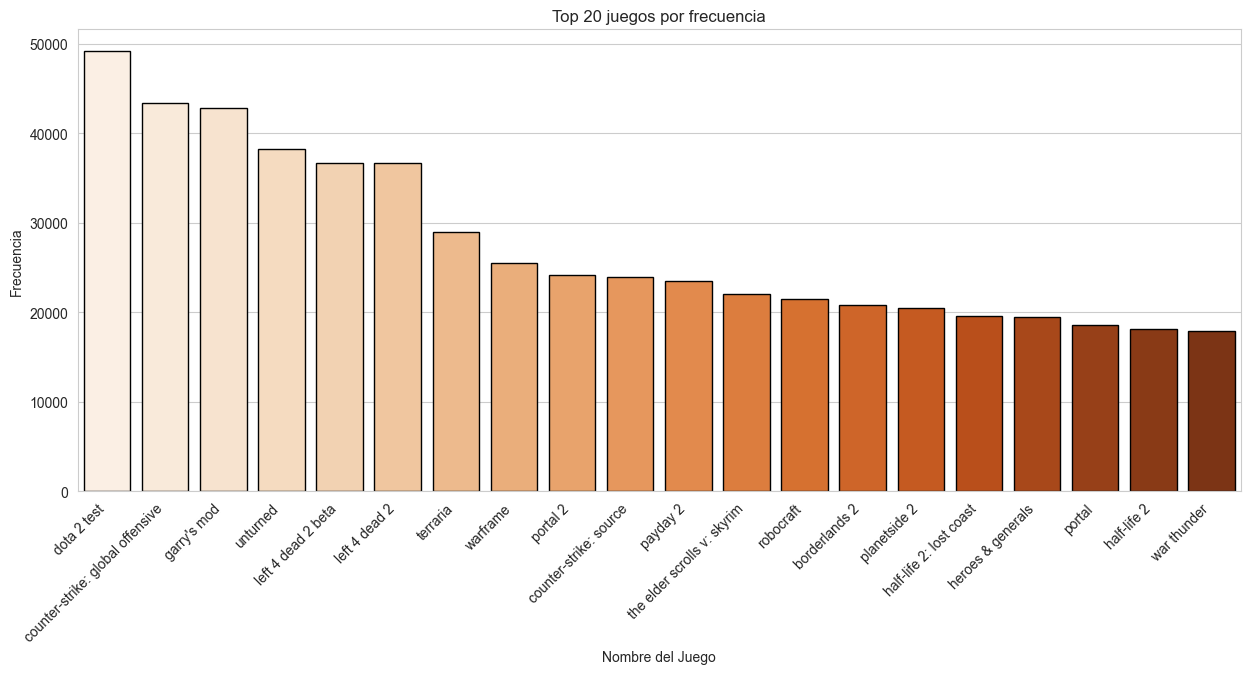

In [35]:
# Cuenta las frecuencias de 'item_name'
item_name_counts = df_items['item_name'].value_counts()

# Configura el tamaño, ancho por la largo
plt.figure(figsize=(15, 6))

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Crea el gráfico de barras
sns.barplot(x=item_name_counts.head(20).index, y=item_name_counts.head(20), palette='Oranges', edgecolor='black')

# Añade etiquetas y título
plt.title('Top 20 juegos por frecuencia')
plt.xlabel('Nombre del Juego')
plt.ylabel('Frecuencia')

# Gira etiquetas en el eje x
plt.xticks(rotation=45, ha="right")

# Muestra el gráfico
plt.show()

**Observaciones**

Los 3 juegos con más reseñados superan las 40000 reseñas, en cambio el 15 mas señado apenas supera las 20000 reseñas.

### df_games

#### Información Básica

Este dataframe cuenta con 6 columnas, todas ellas con valores nulos por lo menos en una fila.

La columna title se refiere al nombre del juego, release_date a la fecha de lanzamiento en formato aaaa-mm-dd, price al precio en dolares, id al identificador unico del juego, developer al desarrollador  y genres al genero. 

Para la columna price la os items gratuitos se les asigna un valor de 0 (cero).

Se ajustan los los tipos de datos de acuerdo a las características de cada columna.

La fila que tiene un valor nulo en la columna id, solo contiene información relevvante en la columna price, en las demás son datos nulos, por lo tanto se decide eliminarla ya que no aporta información relevante.

Se imputan los datos de title a aquellas filas que no tienen valores nulos en esta columna pero si tienen id valido, por medio de df_items. Se convierte a minisculas los datos de esta columna para evitar confuiones en los nombres de ls juegos.

Se eliminan aquellas filas que por su gran cantidad de datos nulos no aportan información relevamte.

In [36]:
# Muestra las primeras filas del dataframe
df_games.head()

,title,release_date,price,id,developer,genres
88310,Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro,Action
88310,Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro,Casual
88310,Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro,Indie
88310,Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro,Simulation
88310,Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro,Strategy


In [37]:
# Brinda información resumida del dataframe
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74834 entries, 88310 to 120444
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         72783 non-null  string 
 1   release_date  72732 non-null  string 
 2   price         71488 non-null  string 
 3   id            74833 non-null  float64
 4   developer     71355 non-null  string 
 5   genres        71551 non-null  object 
dtypes: float64(1), object(1), string(4)
memory usage: 4.0+ MB


In [38]:
# Cuenta la cantida de filas con valores nulos en cada columna
df_games.isnull().sum()

title           2051
release_date    2102
price           3346
id                 1
developer       3479
genres          3283
dtype: int64

In [39]:
# Revisa los valores unicos de la columna price
unique_price = df_games['price'].unique()
print(unique_price)

<StringArray>
[        '4.99', 'Free To Play', 'Free to Play',         '0.99',
         '2.99',         '3.99',         '9.99',        '18.99',
        '29.99',           <NA>,
 ...
        '23.96',         '5.65',         '12.0',        '13.37',
       '189.96',       '124.99',   'Free Movie',        '19.98',
       '160.91',  'Free to Use']
Length: 163, dtype: string


In [40]:
# Convierte todos las letras a minisculas
df_games['price'] = df_games['price'].str.lower()

In [41]:
# Reemplaza los textos que indican que el contenido es gratuito por cero
df_games['price'] = df_games['price'].replace('free to use', '0')
df_games['price'] = df_games['price'].replace('free to play', '0')
df_games['price'] = df_games['price'].replace('free movie', '0')
df_games['price'] = df_games['price'].replace('free', '0')
df_games['price'] = df_games['price'].replace('free demo', '0')
df_games['price'] = df_games['price'].replace('free to try', '0')
df_games['price'] = df_games['price'].replace('play for free!', '0')
df_games['price'] = df_games['price'].replace('install now', '0')
df_games['price'] = df_games['price'].replace('play warmachine: tactics demo', '0')
df_games['price'] = df_games['price'].replace('free mod', '0')
df_games['price'] = df_games['price'].replace('install theme', '0')
df_games['price'] = df_games['price'].replace('third-party', '0')
df_games['price'] = df_games['price'].replace('play now', '0')
df_games['price'] = df_games['price'].replace('free hitman™ holiday pack', '0')
df_games['price'] = df_games['price'].replace('play the demo', '0')
# Reemplaza los textos que indican que el contenido tiene un precio inicial por el precio
df_games['price'] = df_games['price'].replace('starting at $499.00', '499.00')
df_games['price'] = df_games['price'].replace('starting at $449.00', '449.00')

In [42]:
#Cambia el tipo de datos de acuerdo a las necesidades de cada columna
df_games['release_date'] = pd.to_datetime(df_games['release_date'], errors='coerce')
# Extraer solo la parte de la fecha
df_games['release_date'] = df_games['release_date'].dt.date
df_games['price'] = pd.to_numeric(df_games['price'], downcast='float')
df_games['genres'] = df_games['genres'].replace('','without data')
df_games['genres'] = df_games['genres'].apply(str)

#### Eliminación e imputación de datos


Ya que los datos de las columnas 'id' y 'title', tambien estan presentes en df_items, se imputaran los titulos de los id correspondientes que se encuentren en df_items

In [43]:
# Verifica las filas con valores nulos en la columna id
filas_con_id_nulo = df_games[(df_games['id'].isnull())]
filas_con_id_nulo

,title,release_date,price,id,developer,genres
88384,<NA>,NaT,19.99,NaN,<NA>,None


In [44]:
# Elimina las filas con valores nulos en la columna id
df_games = df_games.dropna(subset='id')

In [45]:
filas_con_id_valido_y_title_nulo = df_games[(df_games['id'].notnull()) & (df_games['title'].isnull())]
filas_con_id_valido_y_title_nulo


,title,release_date,price,id,developer,genres
88314,<NA>,NaN,2.99,773570.0,<NA>,None
88321,<NA>,NaN,0.0,724910.0,<NA>,None
88329,<NA>,NaN,4.99,772590.0,<NA>,None
88330,<NA>,NaN,2.99,640250.0,<NA>,None
88332,<NA>,NaN,0.99,711440.0,<NA>,None
...,...,...,...,...,...,...
120383,<NA>,NaN,19.99,745900.0,<NA>,None
120386,<NA>,NaN,1.99,764110.0,<NA>,None
120387,<NA>,NaN,0.0,705860.0,<NA>,None
120395,<NA>,NaN,<NA>,755540.0,<NA>,None


In [46]:
# Selecciona todas las filas con id válido y title nulo
filas_con_id_valido_y_title_nulo = df_games[(df_games['id'].notnull()) & (df_games['title'].isnull())]

# Itera sobre las filas seleccionadas
for index, row in filas_con_id_valido_y_title_nulo.iterrows():
    id_valor = row['id']
    
    # Busca directamente en df_items
    if 'item_id' in df_items.columns and 'item_name' in df_items.columns:  
        filas_con_title_no_nulo_otro = df_items[(df_items['item_id'] == id_valor) & (df_items['item_name'].notnull())]
        # Verifica si hay alguna fila con title no nulo en el segundo DataFrame
        if not filas_con_title_no_nulo_otro.empty:
            # Toma la primera fila con title no nulo en el segundo DataFrame
            fila_con_title_no_nulo_otro = filas_con_title_no_nulo_otro.iloc[0]
            # Imputa el valor de 'title' desde el segundo DataFrame
            df_games.at[index, 'title'] = fila_con_title_no_nulo_otro['item_name']

In [47]:
columnas_excepto_id_genres = ['title', 'release_date', 'price', 'developer']
# Elimina las filas con valores nulos en la columna id
df_games = df_games.dropna(subset=columnas_excepto_id_genres)

In [48]:
df_games['title'] = df_games['title'].str.lower()

In [49]:
# Genera nuevo archivo a partir de un dataframe
df_games.to_parquet('C:/Users/57315/Documentos/Phyton_Henry/recomendaciones_steam/datasets_post_limpieza/df_games_clean.parquet.gzip', compression='gzip')

#### Estadísticas Descriptivas

In [50]:
# Muestra la estadistica descriptiva del df
df_games.describe(include='all')

,title,release_date,price,id,developer,genres
count,68065,68065,68065.0,6.806500e+04,68065,68065
unique,27529,3219,<NA>,NaN,10619,23
top,multiplicity,2017-08-31,<NA>,NaN,Ubisoft - San Francisco,Indie
freq,10,249,<NA>,NaN,2514,15069
mean,NaN,NaN,8.834809,4.636966e+05,NaN,NaN
std,NaN,NaN,16.061518,1.747442e+05,NaN,NaN
min,NaN,NaN,0.0,1.000000e+01,NaN,NaN
25%,NaN,NaN,2.99,3.423600e+05,NaN,NaN
50%,NaN,NaN,4.99,4.610900e+05,NaN,NaN
75%,NaN,NaN,9.99,6.002500e+05,NaN,NaN


**Observaciones**
- Hay 23 generos distintos, de los cuales el más frecuente es Indie con 15069 registros.

#### Distribución de variables cuantitativas

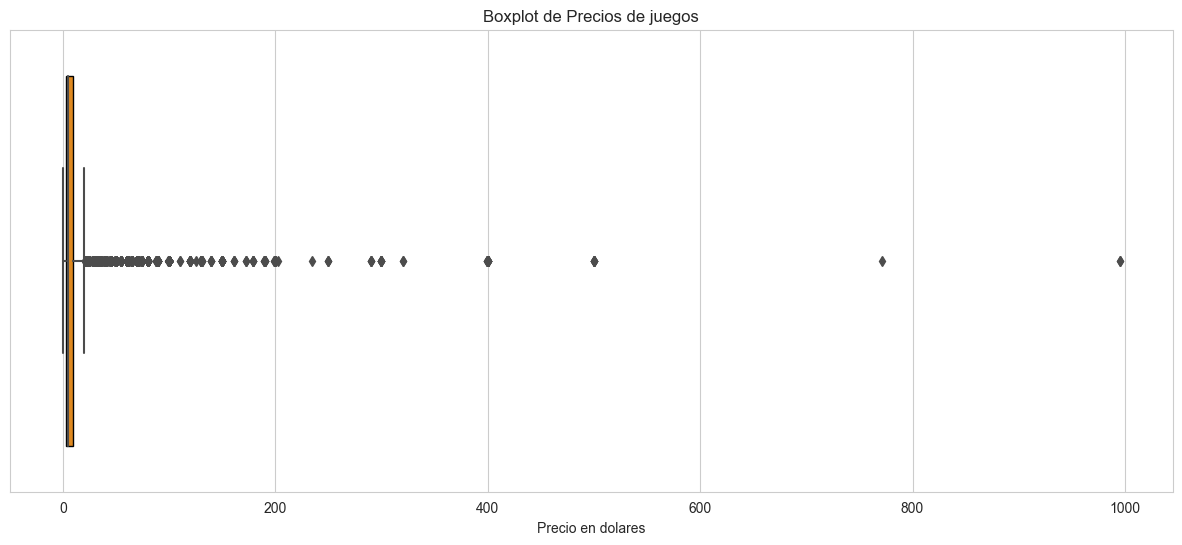

In [51]:
# Boxplot de 'items_count'
# Configura el tamaño de la figura ancho, largo
plt.figure(figsize=(15, 6)) 

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Configura apariencia
boxprops = {'edgecolor': 'black', 'linewidth': 1.0}

# Crea el gráfico de caja y bigotes
sns.boxplot(x=df_games['price'], color='darkorange', boxprops=boxprops)

# Agrega titulo
plt.title('Boxplot de Precios de juegos')
plt.xlabel('Precio en dolares')

# Muestra el gráfico
plt.show()

**Observaciones**

El 75% de los usuarios compran juegos de no mas de 10 USD, sim embargo hay algunos pocos usuarios que compran juegos de 400 USD o más.

#### Distribución de variables categoricas

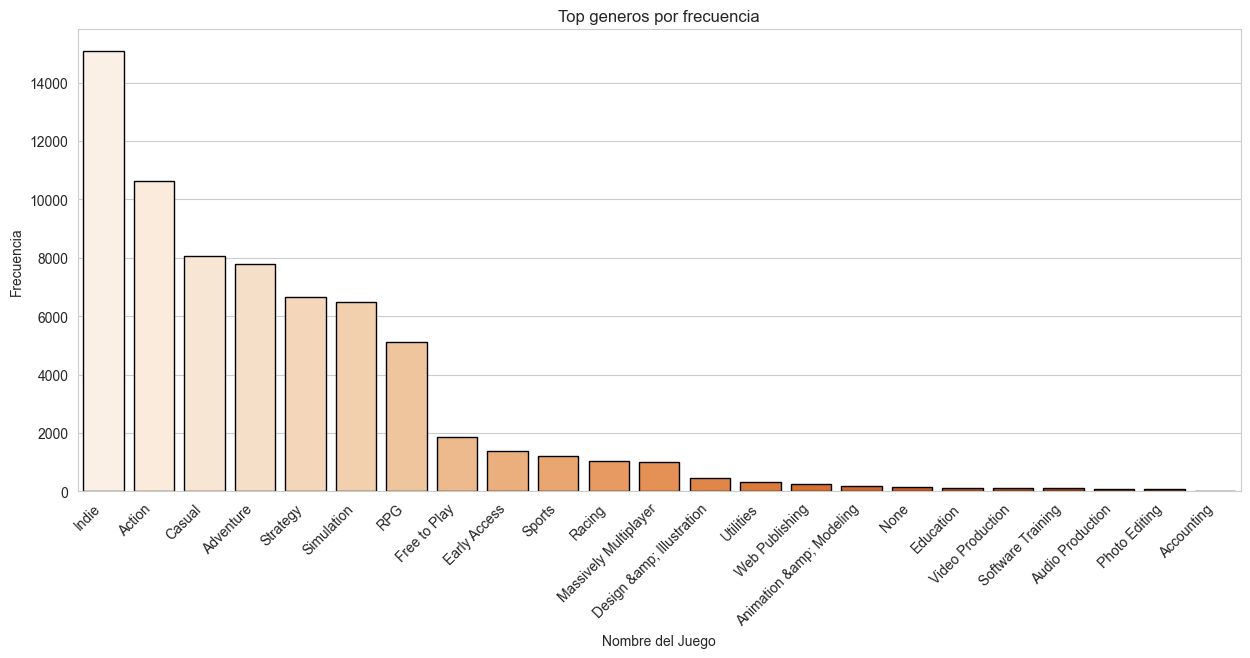

In [52]:
# Cuenta las frecuencias de 'item_name'
item_genre_counts = df_games['genres'].value_counts()

# Configura el tamaño, ancho por la largo
plt.figure(figsize=(15, 6))

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Crea el gráfico de barras
sns.barplot(x=item_genre_counts.index, y=item_genre_counts, palette='Oranges', edgecolor='black')

# Añade etiquetas y título
plt.title('Top generos por frecuencia')
plt.xlabel('Nombre del Juego')
plt.ylabel('Frecuencia')

# Gira etiquetas en el eje x
plt.xticks(rotation=45, ha="right")

# Muestra el gráfico
plt.show()


**Observaciones**

Los 3 generos mas frecuentes superan los 8000 juegos, mientras los 10 generos menos frecuentes no superan los 1000 registros.